In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Survived'>

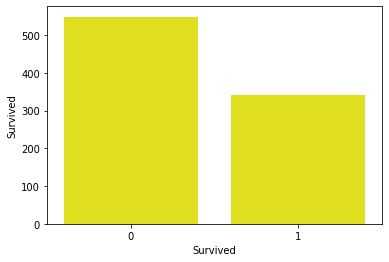

In [9]:
sns.barplot(df['Survived'],df['Survived'].value_counts(),data=df,color='Yellow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

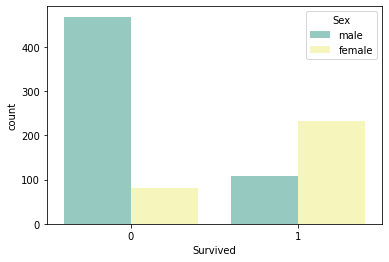

In [10]:
sns.countplot(x=df['Survived'],hue=df['Sex'],data=df,palette='Set3')

<AxesSubplot:xlabel='Survived', ylabel='count'>

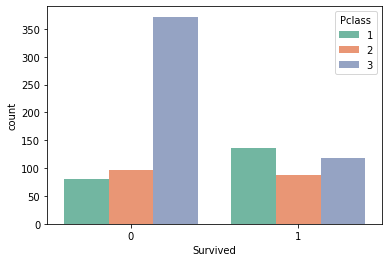

In [11]:
sns.countplot(x=df['Survived'],hue=df['Pclass'],data=df,palette='Set2')

In [12]:
#Two Cases
#First:Drop Name,Embark
#Second:Drop Name,Embark,Cabin

In [13]:
df1 = df.copy() #First
df2 = df.copy() #Second

In [14]:
df1 = df1.drop(['Name','Embarked'],axis=1)
df2 = df2.drop(['Name','Embarked','Cabin'],axis=1)

In [15]:
df1['Sex'] = pd.get_dummies(df1['Sex'],drop_first=True)


In [16]:
df2['Sex'] = pd.get_dummies(df2['Sex'],drop_first=True)

In [17]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,0,38.0,1,0,PC 17599,71.2833
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,0,35.0,1,0,113803,53.1000
4,5,0,3,1,35.0,0,0,373450,8.0500


In [18]:
df2 = df2.drop(['Ticket'],axis=1)

<AxesSubplot:>

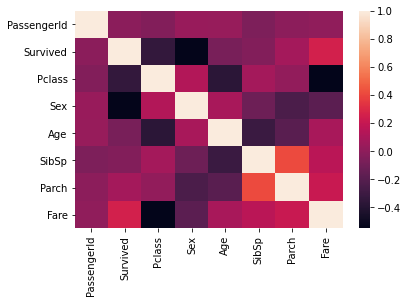

In [19]:
sns.heatmap(df2.corr())

In [20]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [21]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [22]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

## Classification Algorithm
## Logistic Regression
## k-Nearest Neighbors
## Decision Trees
## Support Vector Machine
## Naive Bayes

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X = df2.loc[:,['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']].values
y = df2.loc[:,['Survived']].values

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None)

In [96]:
scores = cross_val_score(lr,X,y,cv=5)
scores = cross_val_score(b,X,y,cv=5)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A colu

In [97]:
scores

array([0.67039106, 0.78651685, 0.80337079, 0.74719101, 0.76966292])

In [30]:
X_test = pd.read_csv('test.csv')

In [31]:
X_test = X_test.drop(['Name','Cabin','Embarked','Ticket'],axis=1)

In [32]:
X_test['Sex'] = pd.get_dummies(X_test['Sex'],drop_first=True)

In [33]:
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

In [37]:
X_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64

In [46]:
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())


In [47]:
y_test = pd.read_csv('gender_submission.csv')

In [48]:
y_test = y_test.drop(['PassengerId'],axis=1)

In [49]:
y_test = y_test.to_numpy()

In [62]:
#Logistic Regression 
lr.fit(X,y)
y_pred = lr.predict(X_test)
pred_prob1 = lr.predict_proba(X_test)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [64]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,pred_prob1[:,1])

In [65]:
score

0.627770083102493

In [67]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X,y)
y_pred = knc.predict(X_test)
pred_prob2 = knc.predict_proba(X_test)
score = roc_auc_score(y_test,pred_prob2[:,1])
score

<ipython-input-67-5f1ab9b9598d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knc.fit(X,y)


0.5836218836565097

In [72]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X,y)
y_pred = dtc.predict(X_test)
pred_prob3 = dtc.predict_proba(X_test)
score = roc_auc_score(y_test,pred_prob3[:,1])
score

0.5

In [73]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X,y)
y_pred = svc.predict(X_test)

score = roc_auc_score(y_test,y_pred)
score

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5

In [77]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB
b = BernoulliNB()
b.fit(X,y)
y_pred1 = b.predict(X_test)
pred_prob4 = b.predict_proba(X_test)
score = roc_auc_score(y_test,pred_prob4[:,1])

score

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1.0

In [76]:
from sklearn.naive_bayes import GaussianNB
g = GaussianNB()
g.fit(X,y)
y_pred = g.predict(X_test)
pred_prob5 = g.predict_proba(X_test)
score = roc_auc_score(y_test,pred_prob5[:,1])
score

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5267857142857143

In [81]:
df = pd.DataFrame(data=y_pred1, columns=["Survived"])

In [82]:
df

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [83]:
d = pd.read_csv('gender_submission.csv')

In [90]:
d = d.drop('Survived',axis=1)

In [93]:
df = pd.concat([d,df],axis=1)

In [95]:
df.to_csv('Sol.csv',index=False)